In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as stats
import scipy.stats as st

# Checkpoint 1: Business and Data Understanding

In [2]:
companies=pd.read_csv('companies.txt',sep='\t',encoding='iso-8859-1')

In [3]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [4]:
# Treating missing values

# There are broadly two ways of treating missing values
# delete - Delete the missing values
# impute:
    # a: Replace the missing values by another value,commonly the mean, median etc
    # b: Predictive techniques - Nearest neighbour (discrete and categorical),linear regression (continuous) (Iterative Imputer)
# Otherwise deletion is often safer and recommended, you may lose some data, but will not make any unreasonable assumption
    

In [5]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [6]:
rounds2=pd.read_csv('rounds2.csv',encoding='iso-8859-1')

In [7]:
# drop unnecessary columns
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [8]:
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [9]:
cols1=['homepage_url','status','state_code','region','city','founded_at']
cols2=['funding_round_permalink','funding_round_code','funded_at']

companies.drop(cols1,axis=1,inplace=True)
rounds2.drop(cols2,axis=1,inplace=True)

In [10]:
companies.head()

,permalink,name,category_list,country_code
0,/Organization/-Fame,#fame,Media,IND
1,/Organization/-Qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
3,/Organization/0-6-Com,0-6.com,Curated Web,CHN
4,/Organization/004-Technologies,004 Technologies,Software,USA


In [11]:
rounds2.head()

,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/ORGANIZATION/-QOUNTER,venture,NaN
2,/organization/-qounter,seed,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0


In [12]:
companies['permalink']=companies['permalink'].str.lower()

In [13]:
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

In [14]:
companies.head()

,permalink,name,category_list,country_code
0,/organization/-fame,#fame,Media,IND
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
3,/organization/0-6-com,0-6.com,Curated Web,CHN
4,/organization/004-technologies,004 Technologies,Software,USA


In [15]:
companies.head()

,permalink,name,category_list,country_code
0,/organization/-fame,#fame,Media,IND
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
3,/organization/0-6-com,0-6.com,Curated Web,CHN
4,/organization/004-technologies,004 Technologies,Software,USA


In [16]:
# Merge Dataframes
master_frame=pd.merge(companies,rounds2,left_on='permalink',right_on='company_permalink',how='inner')

In [17]:
master_frame.drop('company_permalink',axis=1,inplace=True)

In [18]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   permalink           114942 non-null  object 
 1   name                114941 non-null  object 
 2   category_list       111535 non-null  object 
 3   country_code        106271 non-null  object 
 4   funding_round_type  114942 non-null  object 
 5   raised_amount_usd   94958 non-null   float64
dtypes: float64(1), object(5)
memory usage: 6.1+ MB


In [19]:
master_frame.isnull().sum()

permalink                 0
name                      1
category_list          3407
country_code           8671
funding_round_type        0
raised_amount_usd     19984
dtype: int64

In [20]:
round(100*master_frame.isnull().sum()/len(master_frame),2)

permalink              0.00
name                   0.00
category_list          2.96
country_code           7.54
funding_round_type     0.00
raised_amount_usd     17.39
dtype: float64

In [21]:
# Drop those rows which have empty cells equals to 4

In [22]:
master_frame[master_frame.isnull().sum(axis=1)>2]

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
201,/organization/2-ladoshki,2 Ladoshki,NaN,NaN,seed,NaN
275,/organization/24med-sp,24med Sp,NaN,NaN,private_equity,NaN
291,/organization/29west,29West,NaN,NaN,undisclosed,NaN
366,/organization/30secondstofly-claire,30SecondsToFly - Claire,NaN,NaN,undisclosed,NaN
439,/organization/3d-forms,3D Forms,NaN,NaN,undisclosed,NaN
...,...,...,...,...,...,...
114235,/organization/zilker-motors,Zilker Motors,NaN,NaN,non_equity_assistance,NaN
114253,/organization/zim-plant-technology-gmbh,ZIM Plant Technology GmbH,NaN,NaN,seed,NaN
114451,/organization/zlote-mysli,Zlote Mysli,NaN,NaN,venture,NaN
114799,/organization/zuoyebang,Zuoyebang,NaN,NaN,venture,NaN


In [23]:
master_frame2=master_frame[master_frame.isnull().sum(axis=1)<2]

In [24]:
master_frame2

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,venture,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,venture,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
...,...,...,...,...,...,...
114936,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,33149.0
114937,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,convertible_note,41313.0
114938,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,32842.0
114940,/organization/ãasys-2,Ãasys,Consumer Electronics|Internet of Things|Teleco...,USA,seed,18192.0


In [25]:
round(100*master_frame2.isnull().sum()/len(master_frame2),2)

permalink              0.00
name                   0.00
category_list          0.52
country_code           4.87
funding_round_type     0.00
raised_amount_usd     14.48
dtype: float64

In [26]:
master_frame2.dropna(inplace=True)

C:\Users\91976\AppData\Local\Temp\ipykernel_77952\1650158252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame2.dropna(inplace=True)


In [27]:
master_frame2.isnull().sum()

permalink             0
name                  0
category_list         0
country_code          0
funding_round_type    0
raised_amount_usd     0
dtype: int64

In [28]:
master_frame2.reset_index(drop=True,inplace=True)

In [29]:
master_frame2

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
3,/organization/01games-technology,01Games Technology,Games,HKG,undisclosed,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,seed,43360.0
...,...,...,...,...,...,...
88523,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,7000.0
88524,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,33149.0
88525,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,convertible_note,41313.0
88526,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,32842.0


# Checkpoint 2 - Funding Analysis

In [30]:
master_frame2['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [31]:
funding_lst=['seed','angel','venture','private_equity']
master_frame2=master_frame2[master_frame2['funding_round_type'].isin(funding_lst)]

In [32]:
master_frame2['funding_round_type'].unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

In [33]:
master_frame2.reset_index(drop=True,inplace=True)

In [34]:
master_frame2

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
3,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,seed,43360.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,venture,719491.0
...,...,...,...,...,...,...
75118,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,Enterprise Software,CHN,venture,1587301.0
75119,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,7000.0
75120,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,33149.0
75121,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,seed,32842.0


In [35]:
master_frame2.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x))

funding_round_type
private_equity    73938486.3
venture           11724222.7
angel               971573.9
seed                747827.9
Name: raised_amount_usd, dtype: object

### From the above data we can say the perfect funding type for spark funds following the constraint of 10mil-15ml investment amount

In [36]:
# filtering the rows which contain venture investment type
master_frame3=master_frame2[master_frame2['funding_round_type']=='venture']

In [37]:
master_frame3.reset_index(drop=True,inplace=True)

In [38]:
master_frame3.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,venture,719491.0
3,/organization/0xdata,H2O.ai,Analytics,USA,venture,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,venture,1700000.0


# Checkpoint 3 - Country Analysis

In [39]:
master_frame3

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,venture,719491.0
3,/organization/0xdata,H2O.ai,Analytics,USA,venture,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,venture,1700000.0
...,...,...,...,...,...,...
47804,/organization/zyraz-technology,Zyraz Technology,Biotechnology,MYS,venture,7991547.0
47805,/organization/zyrra,Zyrra,E-Commerce,USA,venture,140500.0
47806,/organization/zystor,Zystor,Biotechnology,USA,venture,8500000.0
47807,/organization/zytoprotec,Zytoprotec,Biotechnology,AUT,venture,2686600.0


In [40]:
country_lst=pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language')

In [41]:
s1=country_lst[0]['ISO code']

In [42]:
s2=country_lst[1]['ISO code']

In [43]:
s3=pd.concat([s2,s1],axis=0,ignore_index=True)

In [44]:
len(s3)

58

In [45]:
country_df=pd.DataFrame()
country_df['country_code']=s3

In [46]:
country_df.head()

,country_code
0,AUS
1,NZL
2,GBR
3,USA
4,ATG


In [100]:
master_frame4=pd.merge(master_frame3,country_df,on='country_code',how='inner')

In [101]:
master_frame4['country_code'].unique()

array(['IND', 'CAN', 'USA', 'GBR', 'IRL', 'SGP', 'AUS', 'NZL', 'PHL',
       'ZAF', 'KEN', 'CMR', 'NGA', 'PAK', 'MUS', 'TTO', 'KNA', 'MLT',
       'GHA', 'UGA', 'BWA'], dtype=object)

In [49]:
english_df=master_frame4.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index()

In [50]:
top_9=english_df.head(9)

In [51]:
top_9

,country_code,raised_amount_usd
0,USA,420068029342.0
1,GBR,20072813004.0
2,IND,14261508718.0
3,CAN,9482217668.0
4,SGP,2793917856.0
5,IRL,1669285543.0
6,AUS,1319028698.0
7,NZL,448316383.0
8,ZAF,233713106.0


### From the table we can see that top 3 countries are USA, Great Britain and India where they have received maximum amount of funding ie. venture

# Checkpoint 4: Sector Analysis

In [52]:
top_3_lst=list(top_9['country_code'][:3])
top_3_lst

['USA', 'GBR', 'IND']

In [53]:
master_frame5=master_frame4[master_frame4['country_code'].isin(top_3_lst)]

In [54]:
master_frame5['country_code'].unique()

array(['IND', 'USA', 'GBR'], dtype=object)

In [55]:
master_frame5.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0
2,/organization/247-learning-private,24x7 Learning,EdTech|Education|Systems,IND,venture,4000000.0
3,/organization/3dsoc,3DSoC,3D|Mobile,IND,venture,1240000.0
4,/organization/3dsoc,3DSoC,3D|Mobile,IND,venture,825000.0


In [56]:
master_frame5.shape

(38803, 6)

In [57]:
master_frame5['category_list']=master_frame5['category_list'].apply(lambda x:x.split('|')[0])

C:\Users\91976\AppData\Local\Temp\ipykernel_77952\1782208694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_frame5['category_list']=master_frame5['category_list'].apply(lambda x:x.split('|')[0])


In [58]:
master_frame5.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0
2,/organization/247-learning-private,24x7 Learning,EdTech,IND,venture,4000000.0
3,/organization/3dsoc,3DSoC,3D,IND,venture,1240000.0
4,/organization/3dsoc,3DSoC,3D,IND,venture,825000.0


In [59]:
# read csv file
mapping_df=pd.read_csv('mapping.csv')

In [60]:
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [61]:
mapping_df['category_list']=mapping_df['category_list'].str.replace('0','na')

In [62]:
mapping_df

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [63]:
melt_df=pd.melt(mapping_df,id_vars='category_list',var_name='main_sector')

In [64]:
melt_df2=melt_df[melt_df['value']==1]

In [65]:
melt_df2.reset_index(drop=True,inplace=True)

In [66]:
melt_df2.drop('value',axis=1,inplace=True)

C:\Users\91976\AppData\Local\Temp\ipykernel_77952\4208727721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melt_df2.drop('value',axis=1,inplace=True)


In [67]:
melt_df2

,category_list,main_sector
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports
...,...,...
683,Social Recruiting,"Social, Finance, Analytics, Advertising"
684,Social Television,"Social, Finance, Analytics, Advertising"
685,Social Travel,"Social, Finance, Analytics, Advertising"
686,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [68]:
master_frame6=master_frame4=pd.merge(master_frame5,melt_df2,on='category_list')

In [69]:
master_frame6.shape

(38638, 7)

# Checkpoint 5: Sector 2

In [70]:
D1=master_frame6[master_frame6['country_code']==top_3_lst[0]]
D2=master_frame6[master_frame6['country_code']==top_3_lst[1]]
D3=master_frame6[master_frame6['country_code']==top_3_lst[2]]

In [71]:
D1.reset_index(drop=True,inplace=True)
D2.reset_index(drop=True,inplace=True)
D3.reset_index(drop=True,inplace=True)

In [72]:
D1.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
0,/organization/all-def-digital,All Def Digital,Media,USA,venture,5000000.0,Entertainment
1,/organization/audiosocket,Audiosocket,Media,USA,venture,650000.0,Entertainment
2,/organization/audiosocket,Audiosocket,Media,USA,venture,750000.0,Entertainment
3,/organization/audiosocket,Audiosocket,Media,USA,venture,1582300.0,Entertainment
4,/organization/babble,Babble,Media,USA,venture,2000000.0,Entertainment


In [73]:
D2.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
0,/organization/90min,90min,Media,GBR,venture,15000000.0,Entertainment
1,/organization/90min,90min,Media,GBR,venture,5800000.0,Entertainment
2,/organization/90min,90min,Media,GBR,venture,18000000.0,Entertainment
3,/organization/teepix,Teepix,Media,GBR,venture,1655405.0,Entertainment
4,/organization/31dover,31Dover,E-Commerce,GBR,venture,2274716.0,Others


In [74]:
D3.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,Entertainment
1,/organization/manas-informatics,Manas Informatic,Media,IND,venture,160000.0,Entertainment
2,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0,Others
3,/organization/agrostar,Agrostar,E-Commerce,IND,venture,4000000.0,Others
4,/organization/au-financiers,Au FINANCIERS,E-Commerce,IND,venture,21000000.0,Others


In [75]:
# The total number of investments for each main sector in a seperate column

In [76]:
# USA
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).to_frame().reset_index()

,main_sector,raised_amount_usd
0,Others,8310
1,Cleantech / Semiconductors,7857
2,"Social, Finance, Analytics, Advertising",7246
3,"News, Search and Messaging",4350
4,Health,3269
5,Manufacturing,2453
6,Entertainment,1794
7,Automotive & Sports,505


In [77]:
# GBR
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).to_frame().reset_index()

,main_sector,raised_amount_usd
0,Others,516
1,Cleantech / Semiconductors,437
2,"Social, Finance, Analytics, Advertising",421
3,"News, Search and Messaging",241
4,Entertainment,136
5,Manufacturing,122
6,Health,118
7,Automotive & Sports,44


In [78]:
# IND
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).to_frame().reset_index()

,main_sector,raised_amount_usd
0,Others,284
1,"Social, Finance, Analytics, Advertising",147
2,"News, Search and Messaging",130
3,Entertainment,76
4,Manufacturing,55
5,Cleantech / Semiconductors,54
6,Health,42
7,Automotive & Sports,31


### The total amount invested in each main sector in a seperate column

In [79]:
# USA
D1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index()

,main_sector,raised_amount_usd
0,Cleantech / Semiconductors,118834869645.0
1,"Social, Finance, Analytics, Advertising",86331402349.0
2,Others,82796823598.0
3,"News, Search and Messaging",45439636584.0
4,Health,31675057766.0
5,Manufacturing,24845319470.0
6,Entertainment,17014560960.0
7,Automotive & Sports,11632164696.0


In [80]:
# GBR
D2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index()

,main_sector,raised_amount_usd
0,Cleantech / Semiconductors,5052849729.0
1,Others,4492219646.0
2,"Social, Finance, Analytics, Advertising",3773328672.0
3,"News, Search and Messaging",2956023749.0
4,Entertainment,1162564878.0
5,Health,1046654806.0
6,Manufacturing,1019283214.0
7,Automotive & Sports,480878712.0


In [81]:
# IND
D3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index()

,main_sector,raised_amount_usd
0,Others,6329507440.0
1,"News, Search and Messaging",1739579948.0
2,"Social, Finance, Analytics, Advertising",1578804920.0
3,Automotive & Sports,1556350000.0
4,Entertainment,976191777.0
5,Cleantech / Semiconductors,786444633.0
6,Manufacturing,730260000.0
7,Health,564370000.0


# Checkpoint 6: Plots

In [98]:
top_9

,country_code,raised_amount_usd
0,USA,420068029342.0
1,GBR,20072813004.0
2,IND,14261508718.0
3,CAN,9482217668.0
4,SGP,2793917856.0
5,IRL,1669285543.0
6,AUS,1319028698.0
7,NZL,448316383.0
8,ZAF,233713106.0


In [102]:
top9_1=master_frame4.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).to_frame().reset_index()

In [105]:
top9_11=top9_1[:9]

<AxesSubplot:xlabel='country_code', ylabel='raised_amount_usd'>

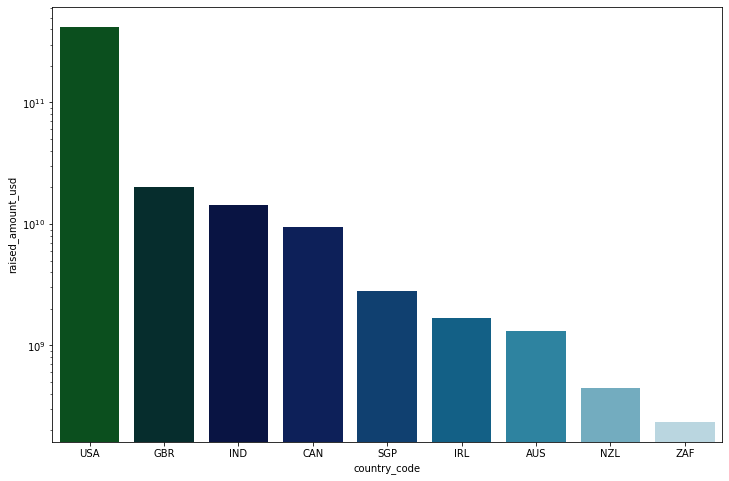

In [128]:
plt.figure(figsize=(12,8))
plt.yscale('log')
sb.barplot(x=top9_11['country_code'],y=top9_11['raised_amount_usd'],palette='ocean')

In [ ]:
################################################################################################################################

In [129]:
plot1=master_frame2.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False).to_frame().reset_index()

In [130]:
plot1

,funding_round_type,raised_amount_usd
0,private_equity,7.393849e+07
1,venture,1.172422e+07
2,angel,9.715739e+05
3,seed,7.478279e+05


<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

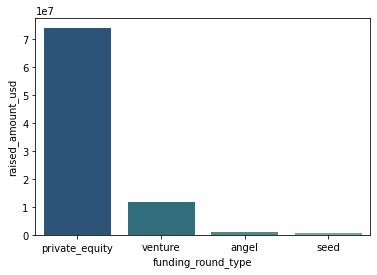

In [132]:
sb.barplot(x=plot1['funding_round_type'],y=plot1['raised_amount_usd'],palette='crest_r')

In [137]:
plot1_2=master_frame2.groupby('funding_round_type')['raised_amount_usd'].sum().sort_values(ascending=False).to_frame().reset_index()

In [138]:
plot1_2

,funding_round_type,raised_amount_usd
0,venture,5.605234e+11
1,private_equity,1.345680e+11
2,seed,1.577468e+10
3,angel,4.274925e+09


<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

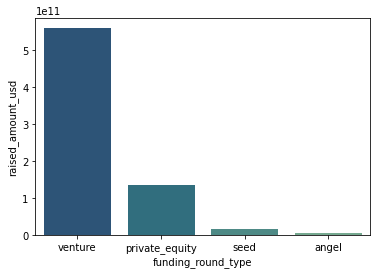

In [139]:
sb.barplot(x=plot1_2['funding_round_type'],y=plot1_2['raised_amount_usd'],palette='crest_r')

<AxesSubplot:title={'center':'Total Funding'}, xlabel='funding_round_type', ylabel='raised_amount_usd'>

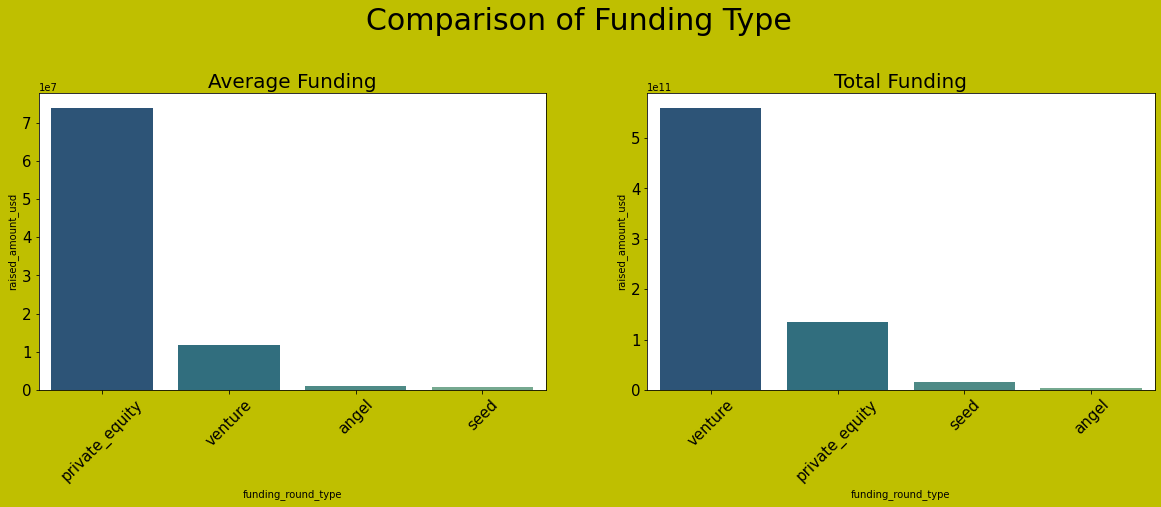

In [170]:
plt.figure(figsize=(20,12),facecolor='y')
plt.suptitle('Comparison of Funding Type',fontsize=30)
plt.subplot(221)
plt.title('Average Funding',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=45,fontsize=15)
sb.barplot(x=plot1['funding_round_type'],y=plot1['raised_amount_usd'],palette='crest_r')

plt.subplot(222)
plt.title('Total Funding',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=45,fontsize=15)
sb.barplot(x=plot1_2['funding_round_type'],y=plot1_2['raised_amount_usd'],palette='crest_r')

plt.subplot(223)
plt.title('Average Funding',fontsize)

In [140]:
################################################################################################################################

In [141]:
us_sec=D1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).to_frame().reset_index()

In [145]:
us_sec=us_sec[:3]
us_sec

,main_sector,raised_amount_usd
0,Cleantech / Semiconductors,1.188349e+11
1,"Social, Finance, Analytics, Advertising",8.633140e+10
2,Others,8.279682e+10


In [147]:
gbr_sec=D2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).to_frame().reset_index()

In [148]:
gbr_sec=gbr_sec[:3]
gbr_sec

,main_sector,raised_amount_usd
0,Cleantech / Semiconductors,5.052850e+09
1,Others,4.492220e+09
2,"Social, Finance, Analytics, Advertising",3.773329e+09


In [150]:
ind_sec=D3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).to_frame().reset_index()

In [151]:
ind_sec=ind_sec[:3]
ind_sec

,main_sector,raised_amount_usd
0,Others,6.329507e+09
1,"News, Search and Messaging",1.739580e+09
2,"Social, Finance, Analytics, Advertising",1.578805e+09


<AxesSubplot:title={'center':'IND'}, xlabel='main_sector', ylabel='raised_amount_usd'>

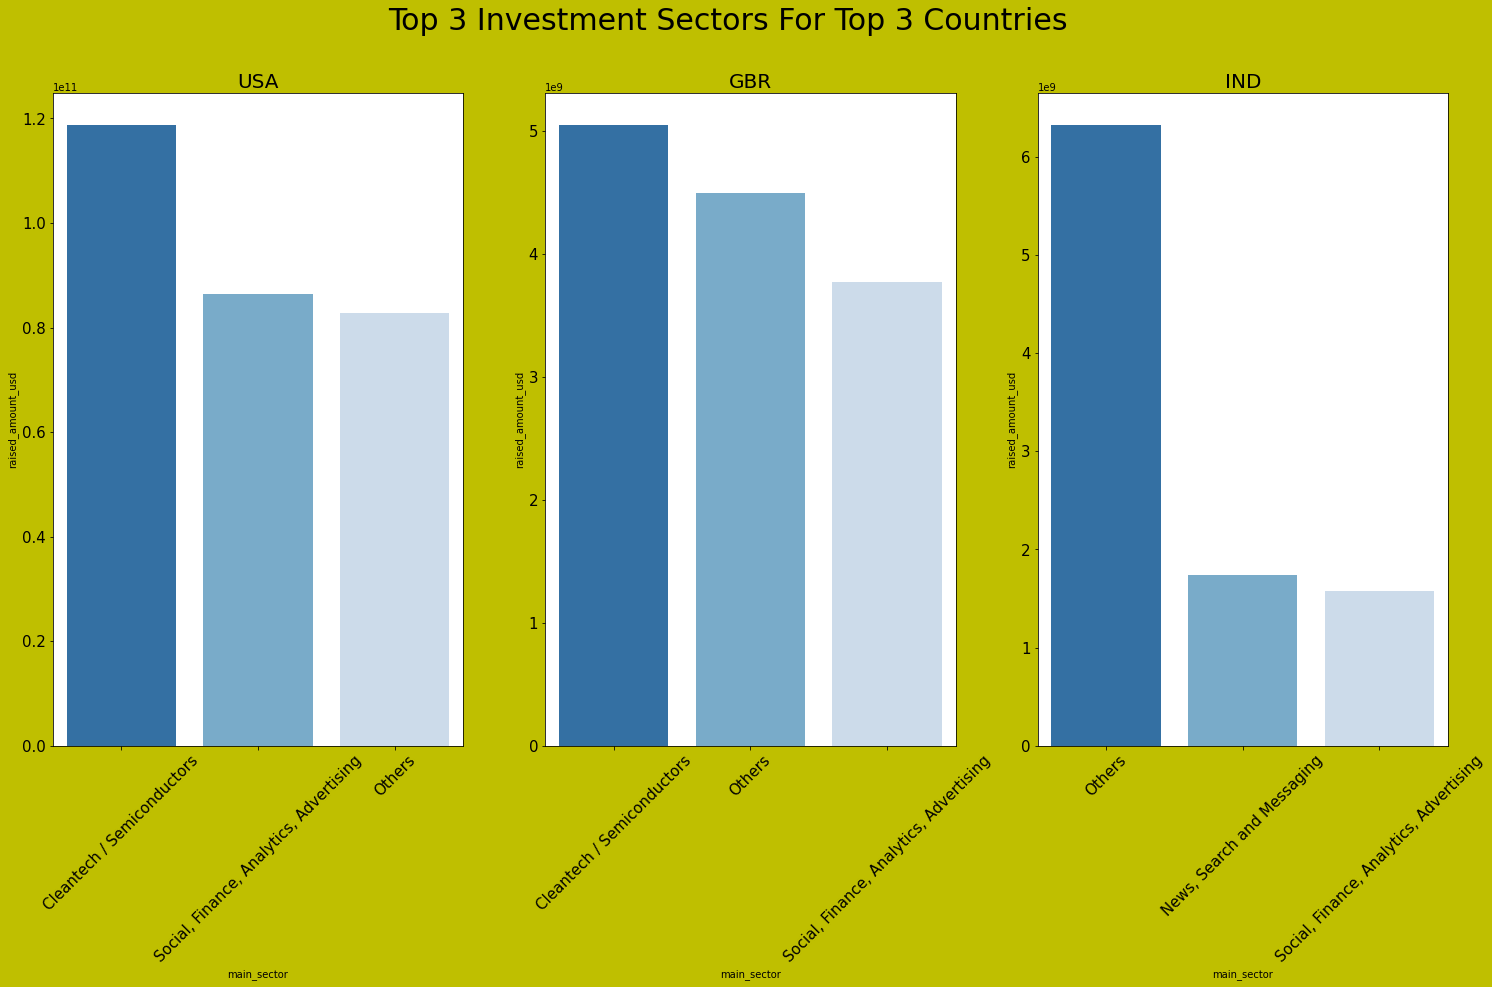

In [169]:
plt.figure(figsize=(25,12),facecolor='y')
plt.suptitle('Top 3 Investment Sectors For Top 3 Countries',fontsize=30)
plt.subplot(131)
plt.title('USA',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=45,fontsize=15)
sb.barplot(x=us_sec['main_sector'],y=us_sec['raised_amount_usd'],palette='Blues_r')

plt.subplot(132)
plt.title('GBR',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=45,fontsize=15)
sb.barplot(x=gbr_sec['main_sector'],y=gbr_sec['raised_amount_usd'],palette='Blues_r')

plt.subplot(133)
plt.title('IND',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=45,fontsize=15)
sb.barplot(x=ind_sec['main_sector'],y=ind_sec['raised_amount_usd'],palette='Blues_r')